# Boosting y Bagging

De forma general, pueden definirse como combinaciones de algoritmos más simples. Son algoritmos ensamblados con el fin de generar un algoritmo más potente.

Hay diversas formas de ensamblar algoritmos. Las más usadas son el bagging y el boosting. Existen otras como el stacking y voting.

# Ensambles - Bagging

Entrenar distintos modelos donde cada uno vea distintas porciones del set de entrenamiento. Acá se dice que los modelos son usados en paralelo, y su uso (el de cada modelo) es independiente (independencia de algoritmos). La idea esencial del bagging es entonces promediar muchos modelos ruidosos pero aproximadamente imparciales, y por tanto reducir la variación. Los árboles son los candidatos ideales para el bagging, dado que ellos pueden registrar estructuras de interacción compleja en los datos, y si crecen suficientemente profundo, tienen relativamente baja parcialidad. Producto de que los árboles son notoriamente ruidosos, ellos se benefician enormemente al promediar.

El principal objetivo de Bagging es reducir la varianza.

Para obtener resultados en bagging se puede usar la votación para los métodos de clasificación y el promedio para los métodos de regresión.

Modelos de bagging comúnmente usados:
* Bagging meta-estimator
* Random forest

**Ejemplo 1:** clasificador Random Forest (RF) para dataset de cáncer de seno (o BreastCancer dataset).

In [1]:
from sklearn import datasets

data = datasets.load_breast_cancer()

In [2]:
print(data.keys())
print(data.DESCR) 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [3]:
import pandas as pd
# Lectura del DataFrame usando feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Agregar columna y completarla con el target
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Variables predictoras y variables a predecir
X = data.data
y = data.target

In [5]:
# Reescalar los datos

from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [6]:
# Separación de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Instanciar el modelo
# Se ingresa valor de n_estimators
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [8]:
# Entrenar el modelo
algoritmo.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [9]:
X_train.shape

(455, 30)

In [10]:
# Predecir
y_pred = algoritmo.predict(X_test)

In [11]:
# Evaluar - Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[40  4]
 [ 1 69]]


+ Datos correctamente clasificados: los de la diagonal principal.
+ Datos clasificados de forma incorrecta: los de la diagonal secundaria.

In [12]:
# Evaluar - Precisión
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9452054794520548


A continuación se carga el dataset de otra forma, y se va a instanciar el modelo RF sin valores de entrada para los hiperparámetros.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [14]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [17]:
df = df[features_mean + ['target']]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


In [18]:
# Variables predictoras y variable a predecir
X = data.data
y = data.target

In [19]:
# Reescalar los datos
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

In [20]:
# Separación de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Instanciar el modelo con valores de entrada para los hiperparámetros
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [22]:
# Entrenar el modelo
algoritmo.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [23]:
# Predecir
y_pred = algoritmo.predict(X_test)

In [24]:
# Evaluar - Matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[40  4]
 [ 2 68]]


In [25]:
# Evaluar - Precisión
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9444444444444444


Ahora se realiza un nuevo ajuste usando RF, pero esta vez sin realizar escalado de datos. Este ajuste se realiza con los valores por defecto del RF.

In [26]:
# Instanciar el modelo
algoritmo2 = RandomForestClassifier()

In [27]:
# Entrenar
algoritmo2.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Predecir
y_pred2 = algoritmo2.predict(X_test)

In [29]:
# Evaluar - Matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred2)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[42  2]
 [ 3 67]]


In [30]:
# Evaluar - Precisión
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred2)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9710144927536232


A continuación se presentan algunas formas de validación empleando el concepto del Out-of-bag error.

Buscando el valor óptimo de n_estimators.

Valor óptimo de n_estimators: 26


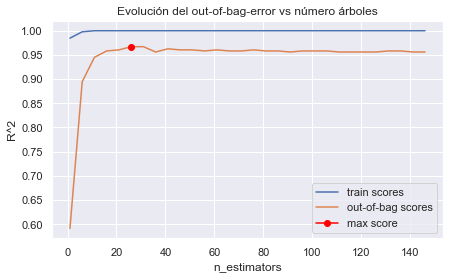

In [32]:
from sklearn.ensemble import RandomForestClassifier
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Ciclo para entrenar un modelo con los valores de n_estimators y extraer error de train y Out-of-Bag error.
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

Validación empleando k-cross-validation y neg_root_mean_squared_error

Valor óptimo de n_estimators: 111


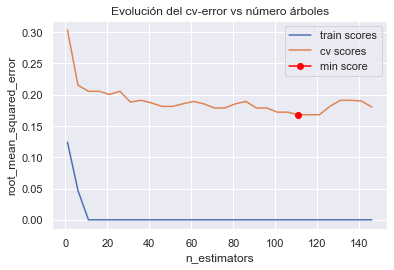

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

train_scores = []
cv_scores    = []

# Rango de valores evaluados
estimator_range = range(1, 150, 5)

# Ciclo para entrenar modelo con valores de n_estimators y extraer error de train y de cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Buscando la cantidad de features que maximiza el desempeño.

Valor óptimo de max_features: 19


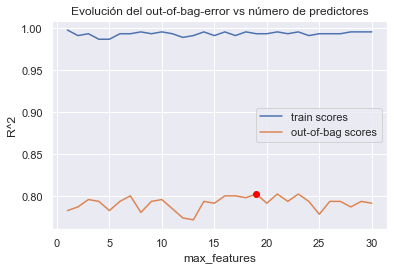

In [36]:
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)


# Ciclo para entrenar modelo con valor de n_estimators definido, y cada valor de  max_features y 
# extraer su error de train y Out-of-Bag.

for max_features in max_features_range:
    modelo = RandomForestClassifier(
                n_estimators = 3,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Las anteriores validación son ejemplos de diversas alternativas para evaluar distintos valores de hiperparámetros. Sin embargo, es siempre recomendable usar la primera.

In [36]:
X_train.shape

(455, 30)

**Ejemplo 2:** Regresión - Ventas según gasto en Pauta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from scipy import stats

style.use('ggplot') or plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Datos
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})
datos.head()

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


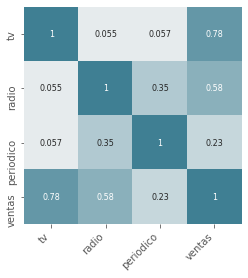

In [3]:
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

<AxesSubplot:>

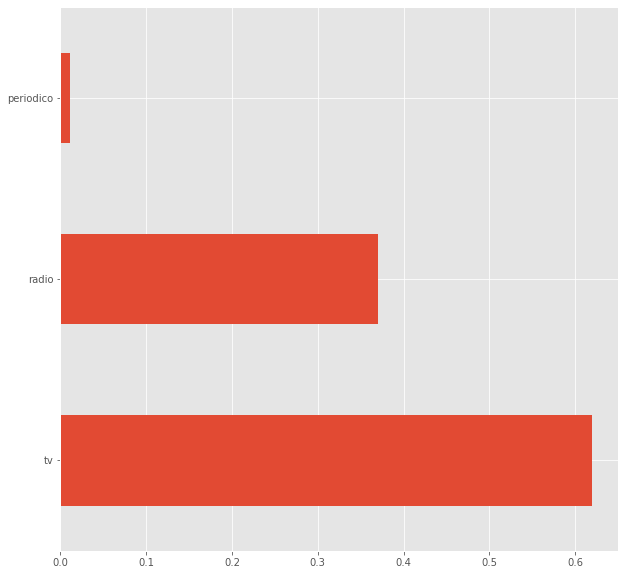

In [4]:
# Variables predictoras y variable a predecir
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
# Instanciar el modelo
model = RandomForestRegressor(random_state=1)
# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir
pred = model.predict(X_test)
# Revisión de Feature Importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [5]:
print('Score del modelo:')
print(model.score(X_train, y_train))

Score del modelo:
0.9967066940540845


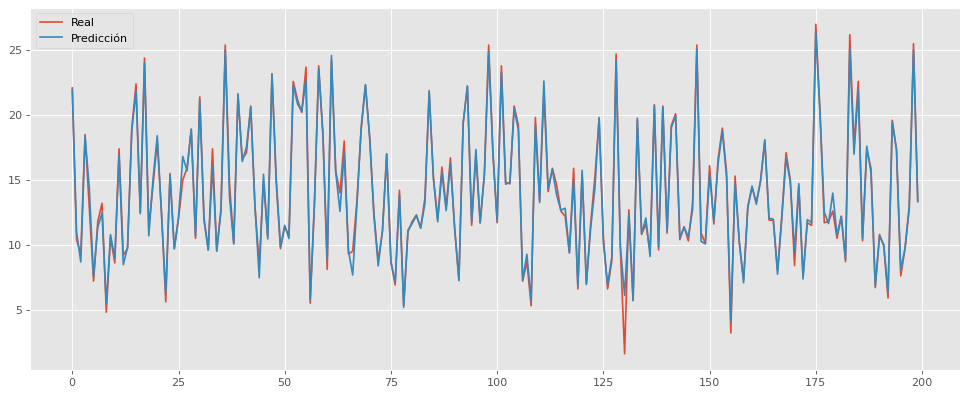

In [8]:
# Predecir para todo el conjunto
y_pred = model.predict(X)
# Gráfico del nivel de ajuste
labels = datos['ventas']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Real')
plt.plot(y2, label = 'Predicción')
plt.legend()
plt.show()

**Ejemplo 3:** regresión. Boston dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)

In [2]:
print('Información en el dataset:')
print(boston.keys())
print()
print('Características del dataset:')
print(boston.DESCR)
print('Cantidad de datos:')
print(boston.data.shape)
print()
print('Nombres columnas:')
print(boston.feature_names)

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD    

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Agrego el precio (target) a mi elemento dataset
dataset['MEDV'] = boston.target

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Variables predictoras y variable a predecir
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)

In [7]:
# Separación de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [8]:
# Instanciar el modelo
from sklearn.ensemble import RandomForestRegressor
bar = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [9]:
# Entrenar el modelo
bar.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=300, random_state=0)

In [10]:
# Predecir
Y_pred = bar.predict(X_test)

In [12]:
# Evaluar
print('Precisión del modelo:')
print(bar.score(X_train, y_train))

Precisión del modelo:
0.9845078387973066


# Ensambles - Boosting

Generar un modelo fuerte a partir de entrenar sucesivamente (uso secuencial) modelos débiles y combinar sus resultados. La idea es que cada modelo débil agregado se enfoque en las instancias que fueron clasificadas erroneamente hasta el momento. Por esto se llaman algoritmos dependientes. El rendimiento general puede ser mejorado haciendo que un modelo simple posterior le de más importancia a los errores cometidos por un modelo simple previo.

El principal objetivo de Boosting es reducción del sesgo de los modelos individuales a partir de los cuales está construido.

Las predicciones de cada modelo simple se combinan por votación (clasificación) o por una suma ponderada (regresión).

Modelos de boosting comúnmente usados:
* AdaBoost
* Gradient Boosting Machine (GBM)
* Extreme Gradient Boosting Machine (XGBM)
* Light GBM
* CatBoost

Ejemplo: Adadboost para Breast Cancer Dataset.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
breast_cancer = load_breast_cancer()
# Variables predictoras y variable a predecir
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [3]:
# Encoding
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

In [4]:
# Separación de datos
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

In [5]:
# Instanciar el modelo
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
# Entrenar
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [6]:
# Predecir
predictions = classifier.predict(test_X)

In [7]:
# Evaluar
confusion_matrix(test_y, predictions)

array([[86,  2],
       [ 3, 52]], dtype=int64)

In [8]:
# Evaluar
from sklearn.metrics import precision_score
precision4 = precision_score(test_y, predictions)
print('Precisión del modelo:')
print(precision4)

Precisión del modelo:
0.9629629629629629


Material adicional:

+ [Ensemble methods: bagging, boosting and stacking](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)
+ [Intro a los sistemas multiclasificadores](https://www.tel.uva.es/descargar.htm;jsessionid=A05C98DFAB70A62FBE4AC2FB7BF7CB49?id=13808)

*Anexo: Random Forest*

Random forest (Bosque aleatorio) es una combinación de árboles predictores no correlacionados que luego son promediados. Este modelo además de aplicar Bagging, también selecciona features al azar, así reduce la correlación de los distintos modelos de árbol creados. El objetivo es obtener una predicción más precisa y estable que con un modelo simple (por ejemplo un Árbol de decisión). 

* RF agrega aleatoriedad adicional al modelo, mientras crece los árboles.
* En lugar de buscar la característica más importante al dividir un nodo, busca la mejor característica entre un subconjunto aleatorio de características. Esto da como resultado una diversidad que generalmente resulta en un mejor modelo.
* Incluso puede hacer que los árboles sean más aleatorios, mediante el uso adicional de umbrales aleatorios para cada función en lugar de buscar los mejores umbrales posibles, como lo hace un árbol de decisión normal.

De forma general, mientras más árboles en el bosque se vea, más robusto es el bosque.

Ventajas
+ Ser uno de los algoritmos de ML más certeros que hay disponible. Para un set de datos lo suficientemente grande produce un clasificador muy certero. A diferencia de los árboles de decisión, la clasificación hecha por RF es difícil de interpretar.
+ Puede manejar fácilmente muchas de variables de entrada
+ Es un método eficaz para estimar datos perdidos y mantener la exactitud cuando una gran proporción de los datos está perdida.

Desventajas
+ RF sobreajusta en ciertos grupos de datos con tareas de clasificación o regresión ruidosas.
+ En datos con variables categóricas con diferentes niveles, RF tiende a irse en favor de esos atributos con más niveles. Por ende, la posición que marca la variable no es muy fiable para este tipo de datos.
+ Tiende a ser un mejor modelo para predecir que para explicar.

Diferencia entre Árboles de Decisión y Bosques Aleatorios

Si se ingresa un conjunto de datos de entrenamiento con características y etiquetas en un árbol de decisión, formulará un conjunto de reglas, que se utilizarán para hacer las predicciones.

Por ejemplo, si deseas predecir si una persona hará clic en un anuncio en línea, puedes recopilar información sobre el anuncio, la persona que hizo clic en el pasado y algunas características que describen su decisión. Si colocamos estas características en un Árbol de Decisión, generará algunas reglas para luego predecir si se hará clic en el anuncio o no. Por su parte un Bosque Aleatorio selecciona al azar las observaciones y características para construir varios Árboles de Decisión y luego promedia los resultados.

Otra diferencia es que cuando los Árboles de Decisión son muy profundos pueden sufrir de sobreajuste. Por su parte los Bosques Aleatorios evita el exceso de adaptación la mayor parte del tiempo, creando subconjuntos aleatorios de las características y construyendo árboles más pequeños utilizando estos subconjuntos, posteriormente combina los subárboles. Ten en cuenta que esto no funciona todas las veces y que también hace que el cálculo sea más lento, dependiendo de cuántos árboles genere el bosque al azar.

Ventajas y Desventajas de los Bosques Aleatorios
Los Bosques Aleatorios se considera un algoritmo muy útil y fácil de usar ya que los parámetros predeterminados a menudo producen un buen resultado de predicción. De igual forma, el número de parámetros tampoco es tan alto y son fáciles de entender.

Uno de los grandes problemas en Machine Learning es el sobreajuste, pero la mayoría de las veces esto no será tan fácil para un algoritmo de Bosques Aleatorios, esto se debe a que, si hay suficientes árboles en el bosque, el algoritmo no se adaptará al modelo.

La principal limitación de Bosques es que una gran cantidad de árboles puede hacer que el algoritmo sea lento e ineficiente para las predicciones en tiempo real. En general, estos algoritmos son rápidos para entrenar, pero bastante lentos para crear predicciones una vez que están entrenados. Una predicción más precisa requiere más árboles, lo que resulta en un modelo más lento. En la mayoría de las aplicaciones del mundo real, el algoritmo de Bosque Aleatorio es lo suficientemente rápido, pero ciertamente puede haber situaciones en las que el rendimiento en tiempo de ejecución es importante y se prefiera otros enfoques.

Adicionalmente, los Bosques Aleatorios es una herramienta de modelado predictivo y no una herramienta descriptiva. Eso significa que, si estás buscando una descripción de las relaciones en los datos, deberás elegir otro algoritmo.